In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
# Initialize the models
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)

# Train the models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True)

In [5]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)


In [6]:
# Function to calculate evaluation metrics
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

# Evaluate Logistic Regression
acc_log_reg, prec_log_reg, rec_log_reg, f1_log_reg, conf_log_reg = evaluate_model(y_test, y_pred_log_reg)
# Evaluate Decision Tree
acc_decision_tree, prec_decision_tree, rec_decision_tree, f1_decision_tree, conf_decision_tree = evaluate_model(y_test, y_pred_decision_tree)
# Evaluate Random Forest
acc_random_forest, prec_random_forest, rec_random_forest, f1_random_forest, conf_random_forest = evaluate_model(y_test, y_pred_random_forest)
# Evaluate SVM
acc_svm, prec_svm, rec_svm, f1_svm, conf_svm = evaluate_model(y_test, y_pred_svm)


In [7]:
# Compile the results into a DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [acc_log_reg, acc_decision_tree, acc_random_forest, acc_svm],
    'Precision': [prec_log_reg, prec_decision_tree, prec_random_forest, prec_svm],
    'Recall': [rec_log_reg, rec_decision_tree, rec_random_forest, rec_svm],
    'F1 Score': [f1_log_reg, f1_decision_tree, f1_random_forest, f1_svm]
})

print(results)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.973684   0.972222  0.985915  0.979021
1        Decision Tree  0.947368   0.957746  0.957746  0.957746
2        Random Forest  0.964912   0.958904  0.985915  0.972222
3                  SVM  0.982456   0.972603  1.000000  0.986111


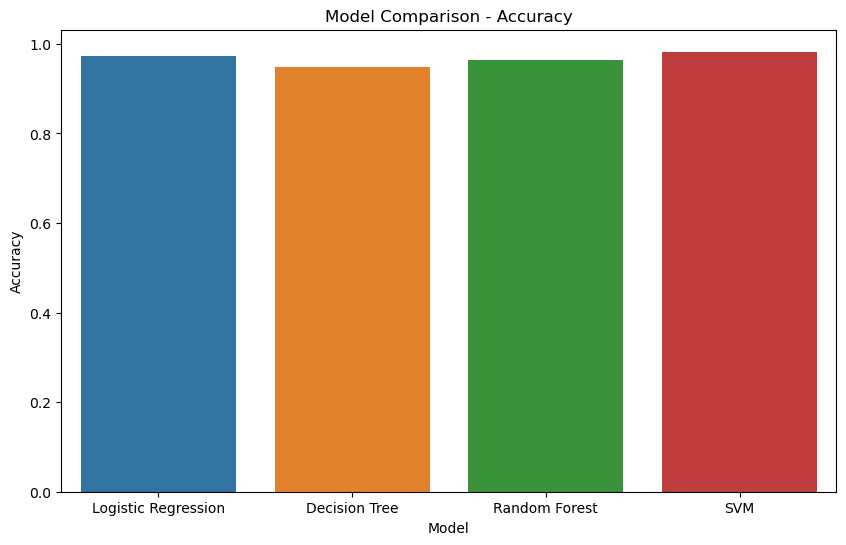

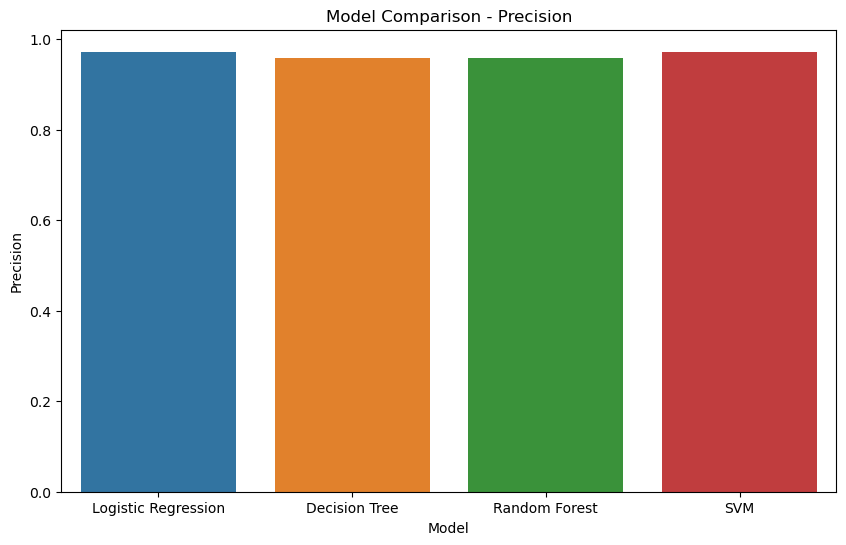

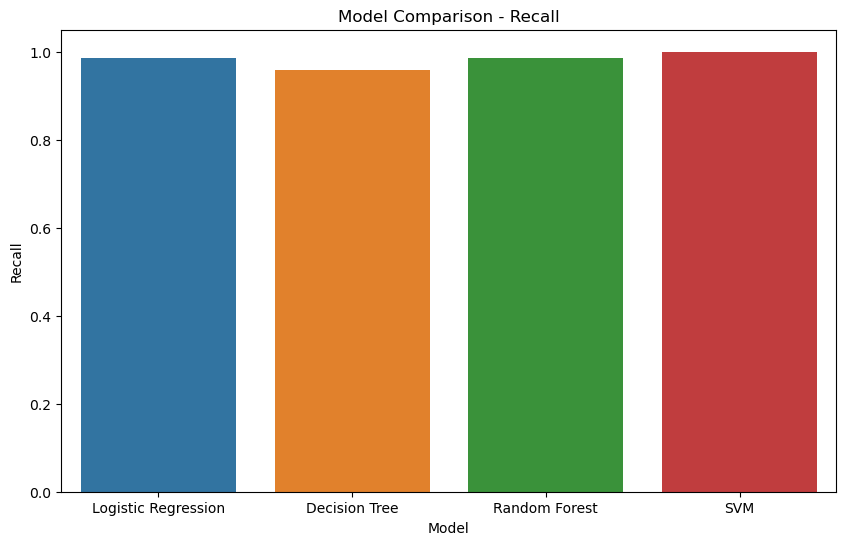

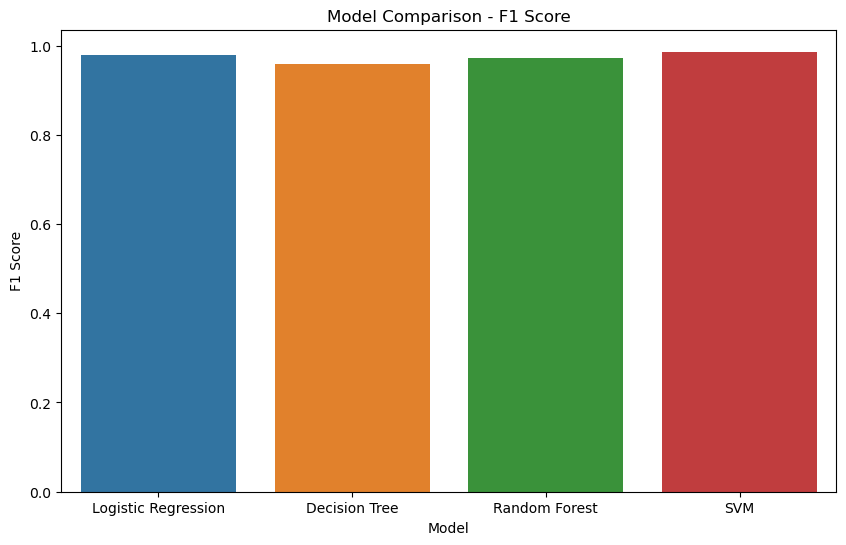

In [8]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Comparison - Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=results)
plt.title('Model Comparison - Precision')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=results)
plt.title('Model Comparison - Recall')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=results)
plt.title('Model Comparison - F1 Score')
plt.show()


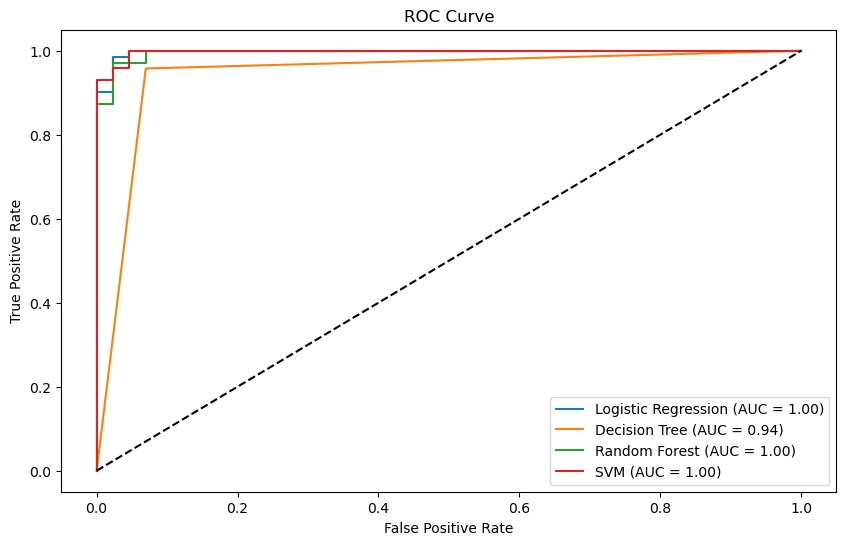

In [9]:
# Function to plot ROC curve
def plot_roc_curve(y_test, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

# Plot ROC curves
plt.figure(figsize=(10, 6))
plot_roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1], 'Logistic Regression')
plot_roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1], 'Decision Tree')
plot_roc_curve(y_test, random_forest.predict_proba(X_test)[:, 1], 'Random Forest')
plot_roc_curve(y_test, svm.predict_proba(X_test)[:, 1], 'SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
